In [113]:
import numpy as np
import matplotlib.pyplot as plt
import re
import ast

In [114]:
def visualize_tour(test_num, cities, tour_list, score_list, savefig=True) -> None:
    """
    Visualizes the TSP tour.

    Parameters:
    - cities: A list of tuples representing the (x, y) coordinates of each city.
    - tour: A list of indices representing the order in which to visit the cities.
    """

    if len(tour_list) != 2:
        ValueError("tour_list should contain exactly two tours to visualize.")

    fig, ax = plt.subplots(2, 1, dpi=300)

    for i in range(len(tour_list)):
        tour_cities = [cities[i] for i in tour_list[i]] + [cities[tour_list[i][0]]]
        x, y = zip(*tour_cities)

        ax[i].plot(x, y, "r.")
        ax[i].plot(x, y, linestyle="--", color="blue")

        ax[i].set_title(
            f"Method: {'Classic PSO' if i ==0 else 'Improved ACS'} / Test: {test_num} / Score: {score_list[i]}"
        )
        ax[i].set_xlabel("X Coordinate")
        ax[i].set_ylabel("Y Coordinate")
        ax[i].grid()

    plt.tight_layout()
    if savefig:
        fig.savefig(f"./test{test_num}.png", dpi=300)
    plt.show()


def parse_string_to_components(input_string):
    pattern = r"^(\d+)\s+(\d+)\s+(.+)$"

    match = re.match(pattern, input_string.strip())
    if not match:
        raise ValueError(f"Некорректный формат строки: {input_string}")

    first_num = int(match.group(1))
    second_num = int(match.group(2))
    list_str = match.group(3)

    # Безопасно преобразуем строку списка в реальный список
    try:
        numbers_list = ast.literal_eval(list_str)
    except (SyntaxError, ValueError) as e:
        raise ValueError(f"Некорректный формат списка: {list_str}") from e

    return first_num, second_num, numbers_list

In [115]:
names = [
    "../data/tsp_51_1",
    "../data/tsp_100_3",
    "../data/tsp_200_2",
    "../data/tsp_574_1",
    "../data/tsp_1889_1",
    "../data/tsp_33810_1",
]

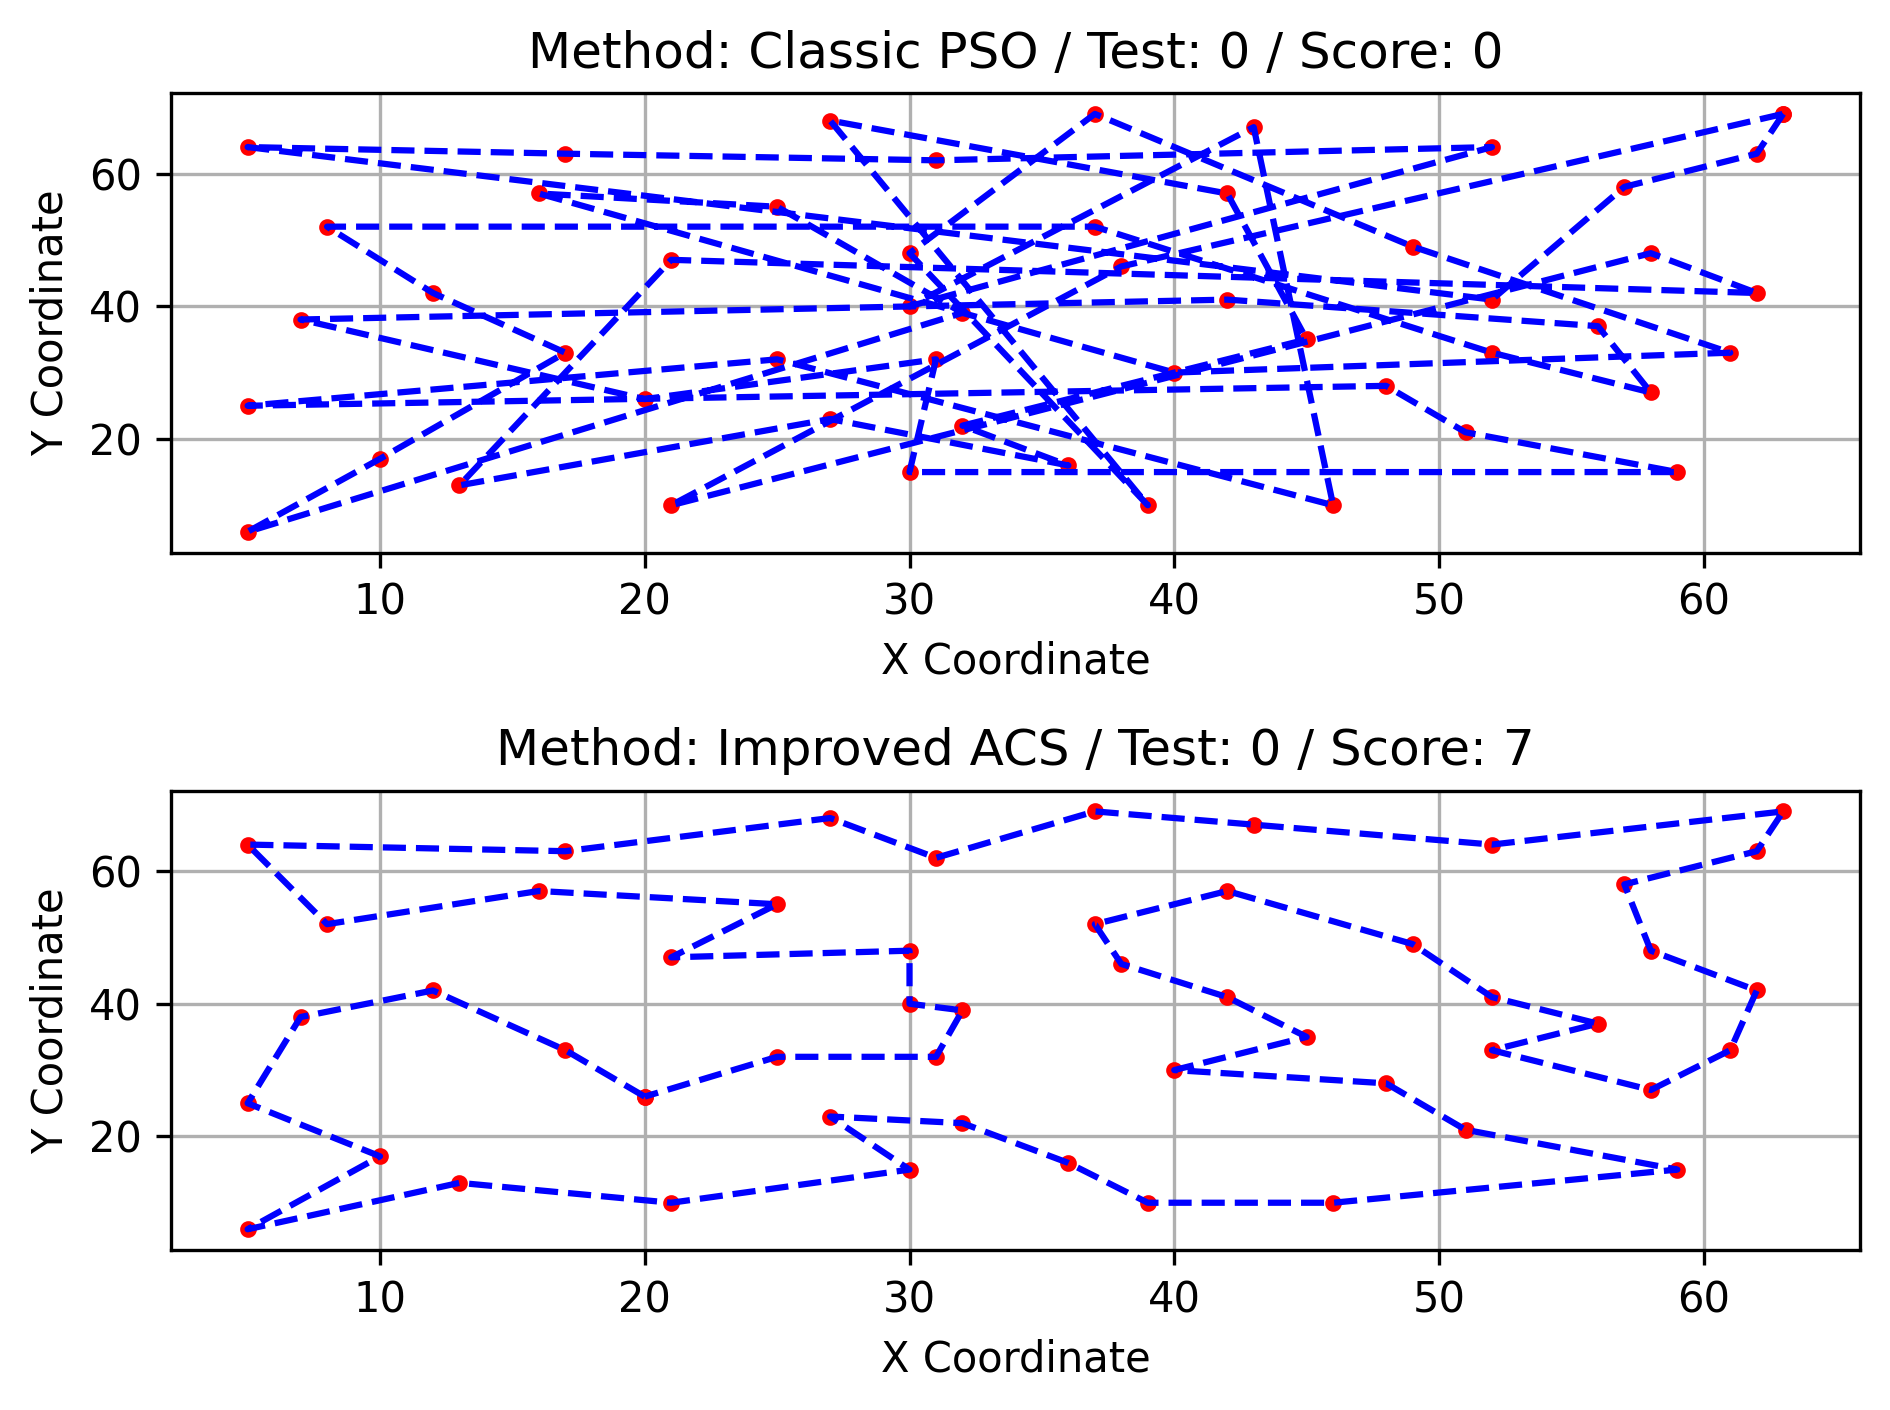

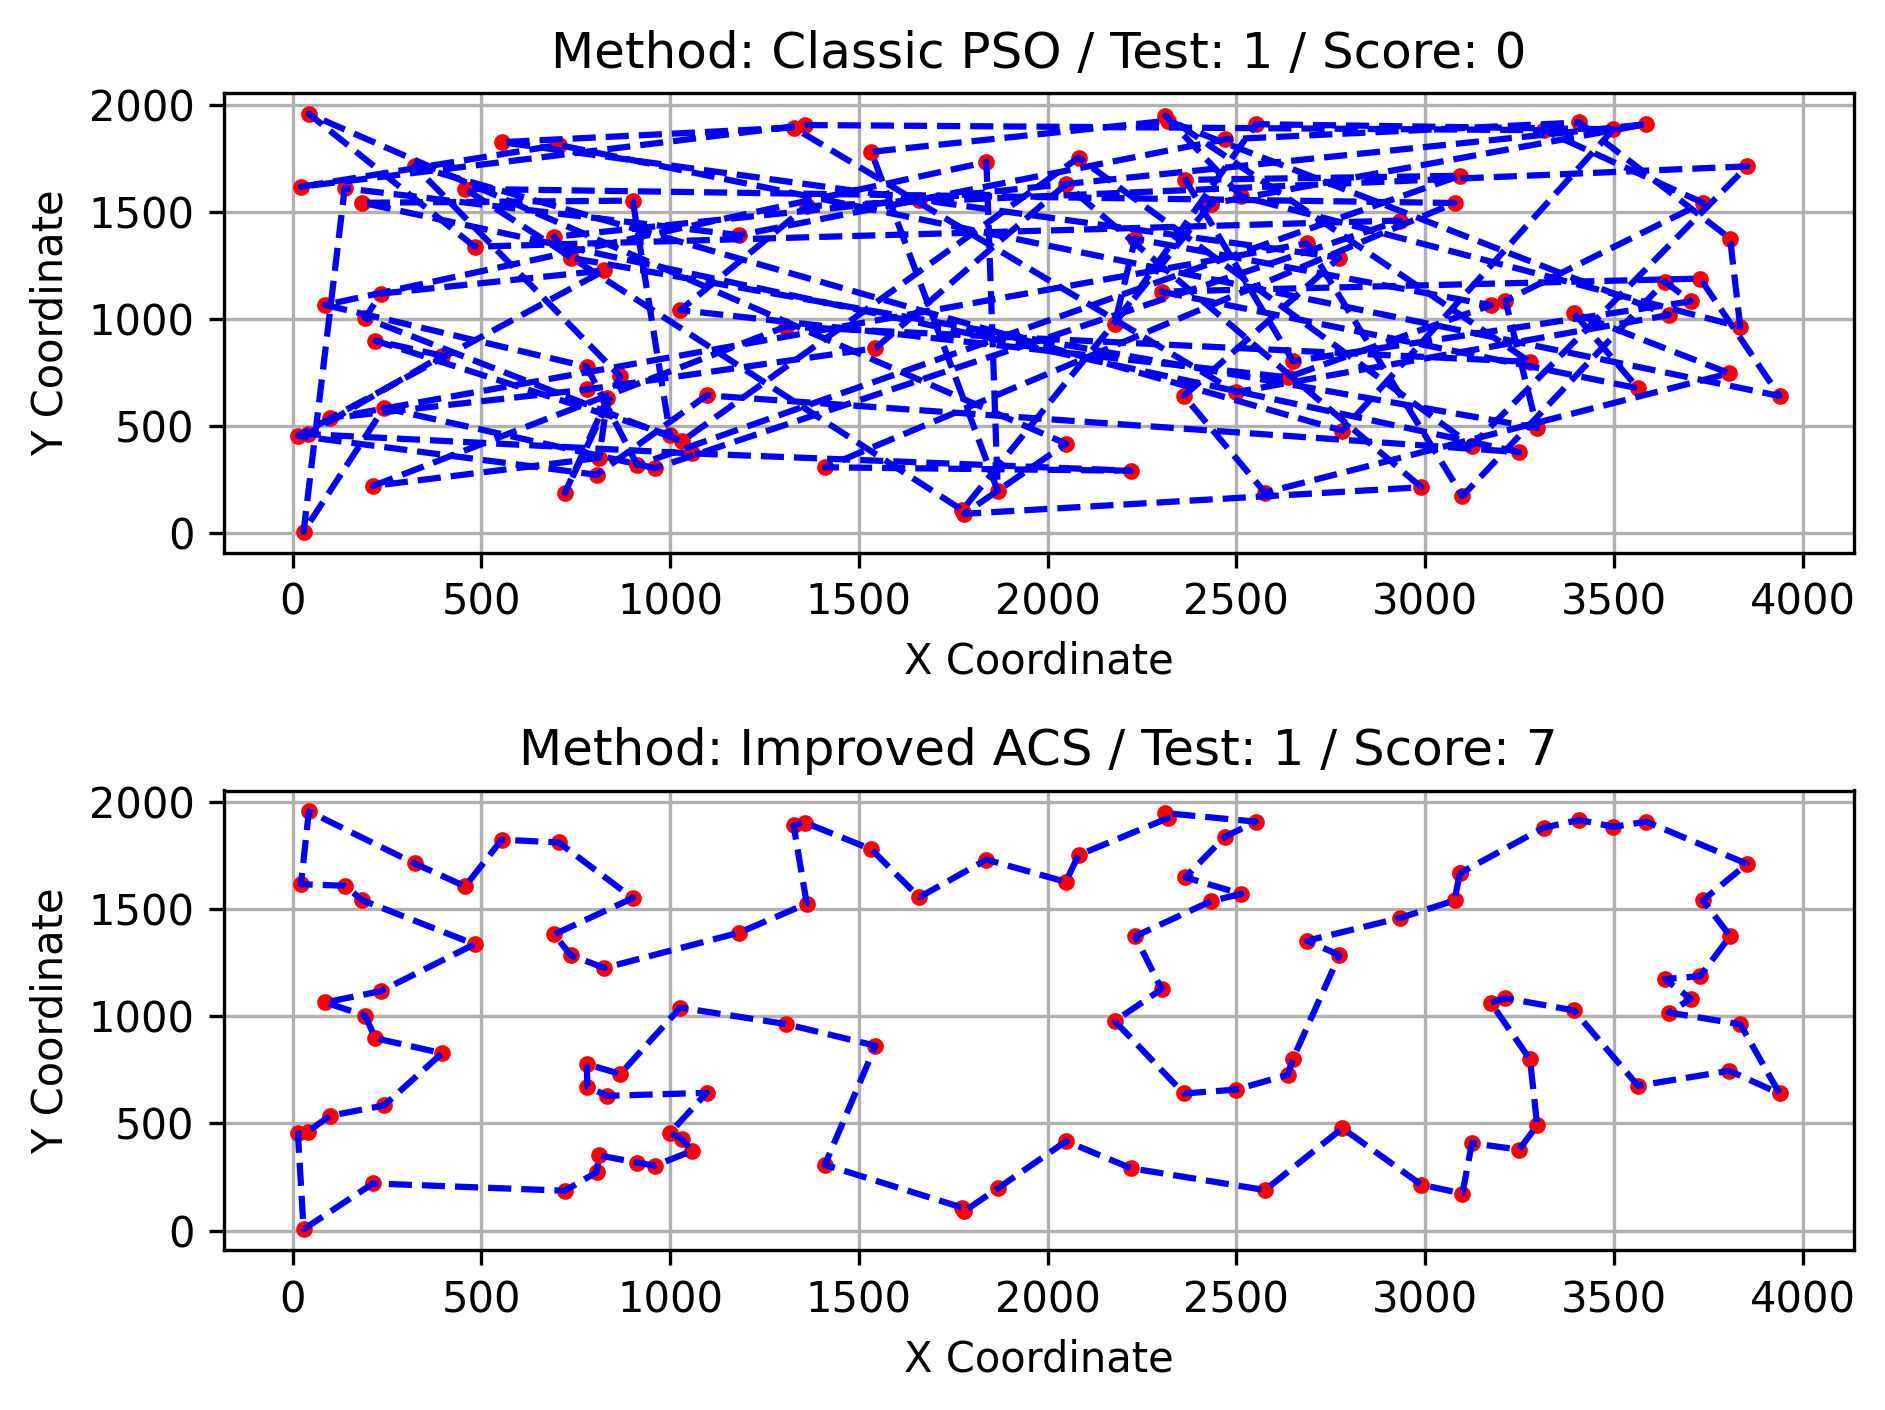

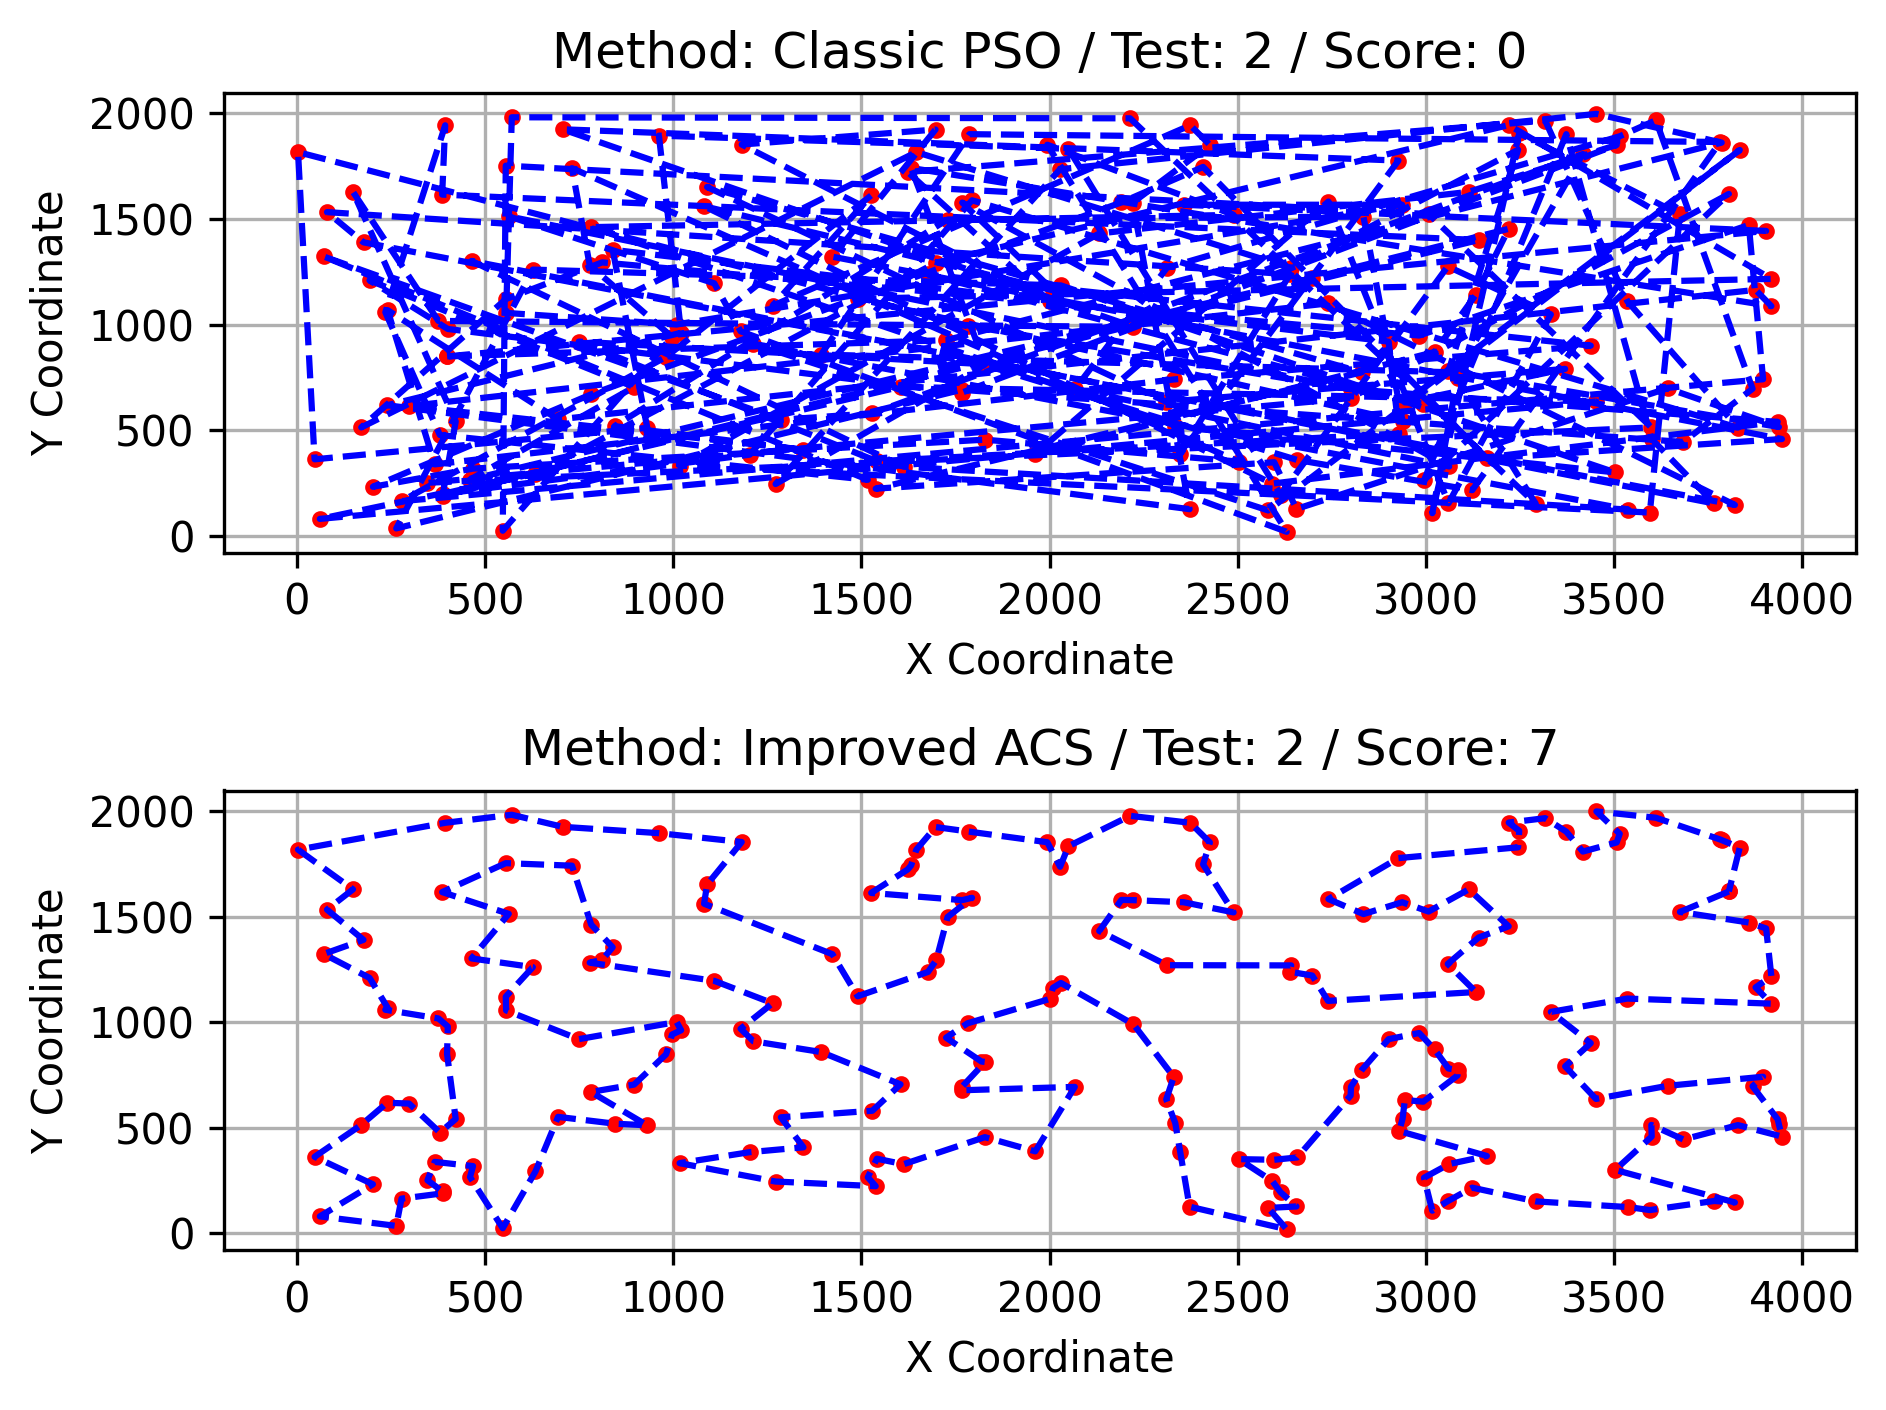

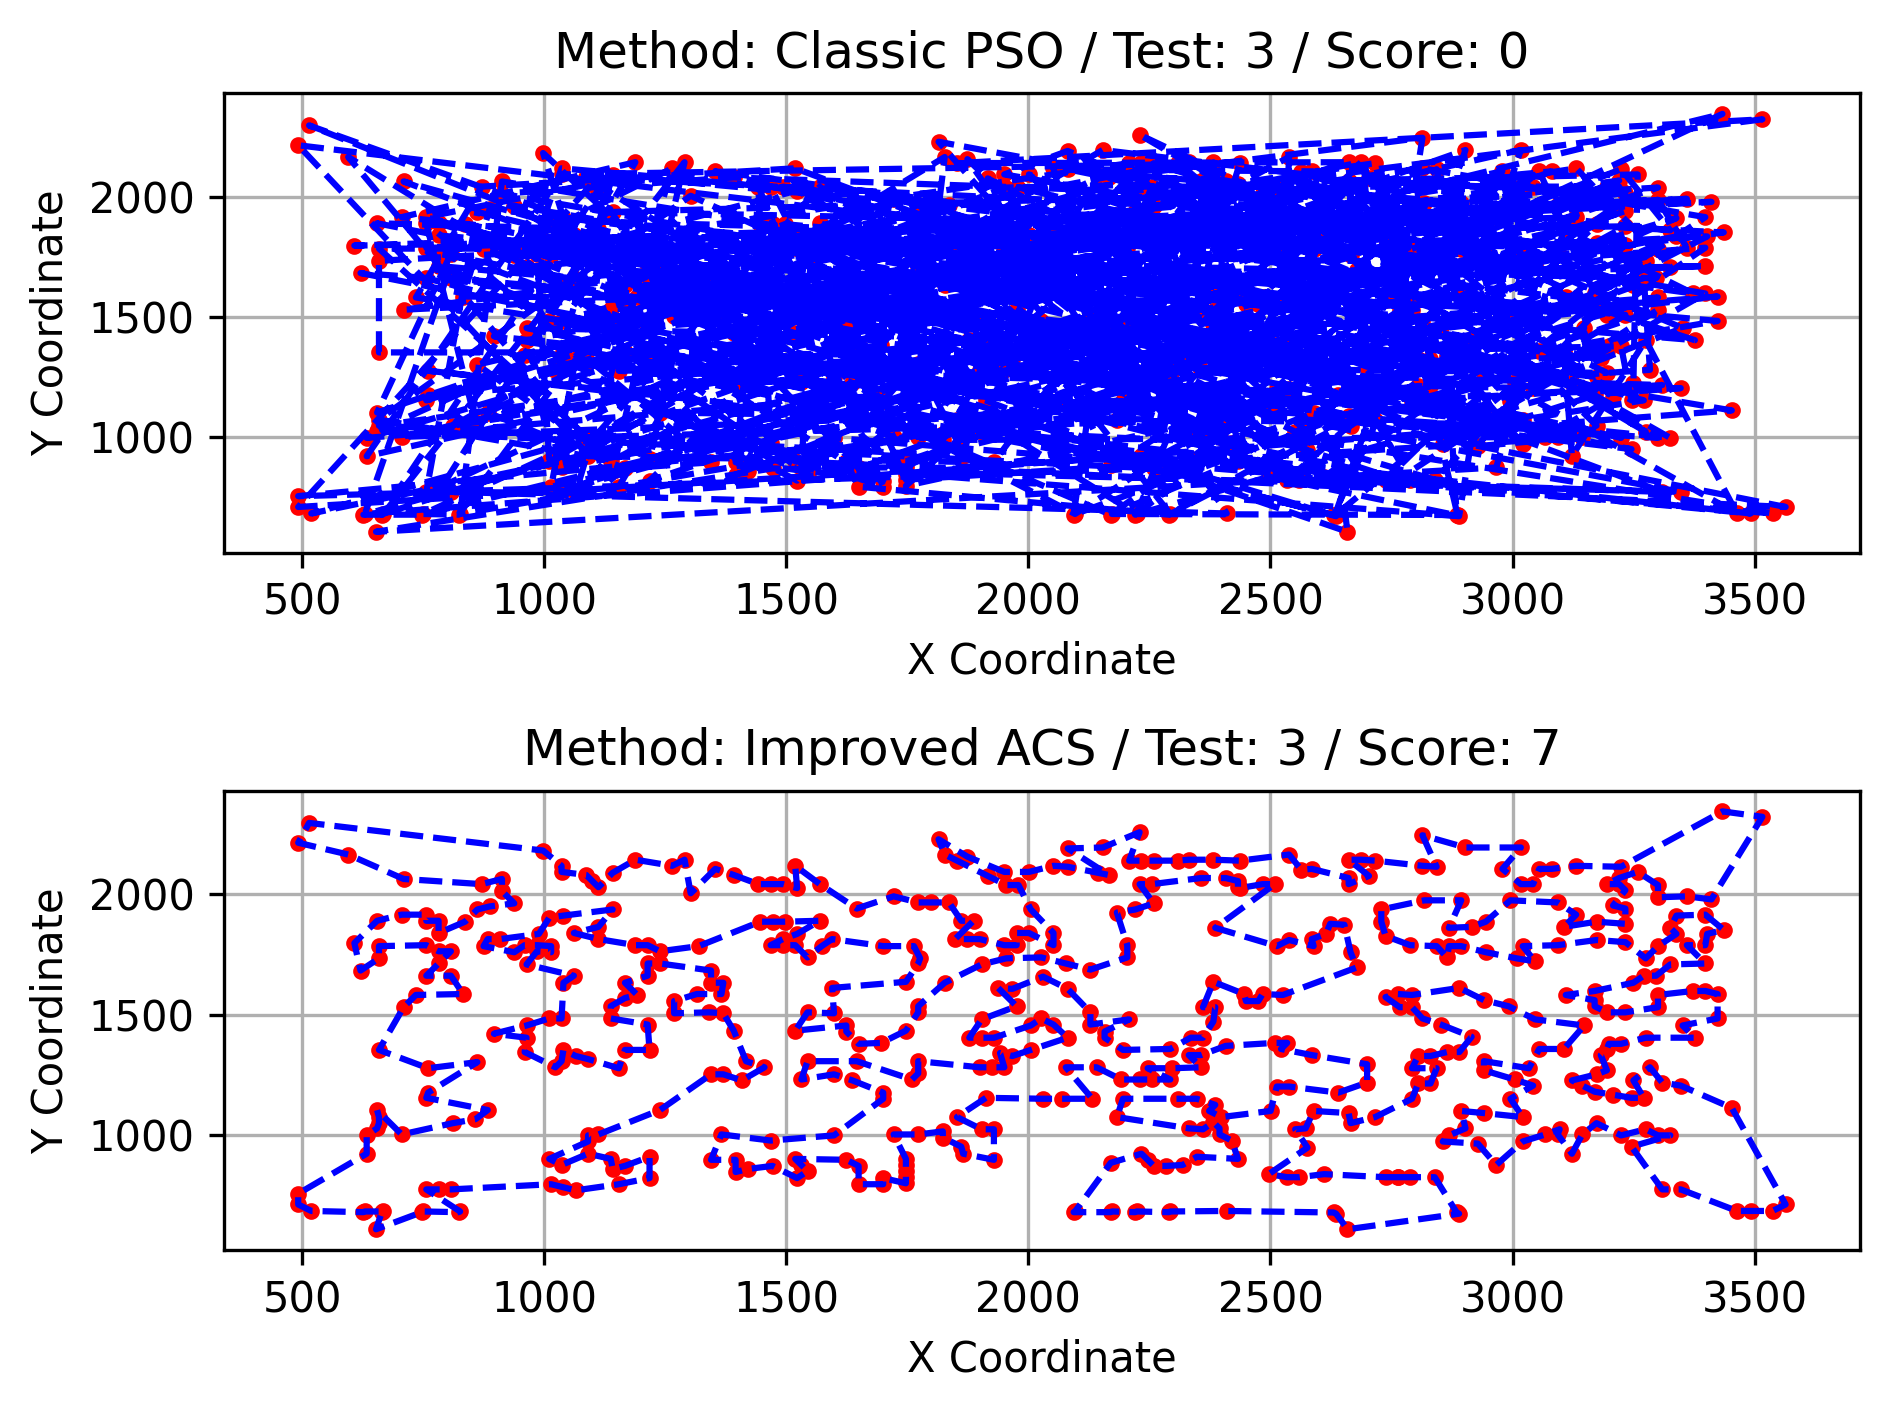

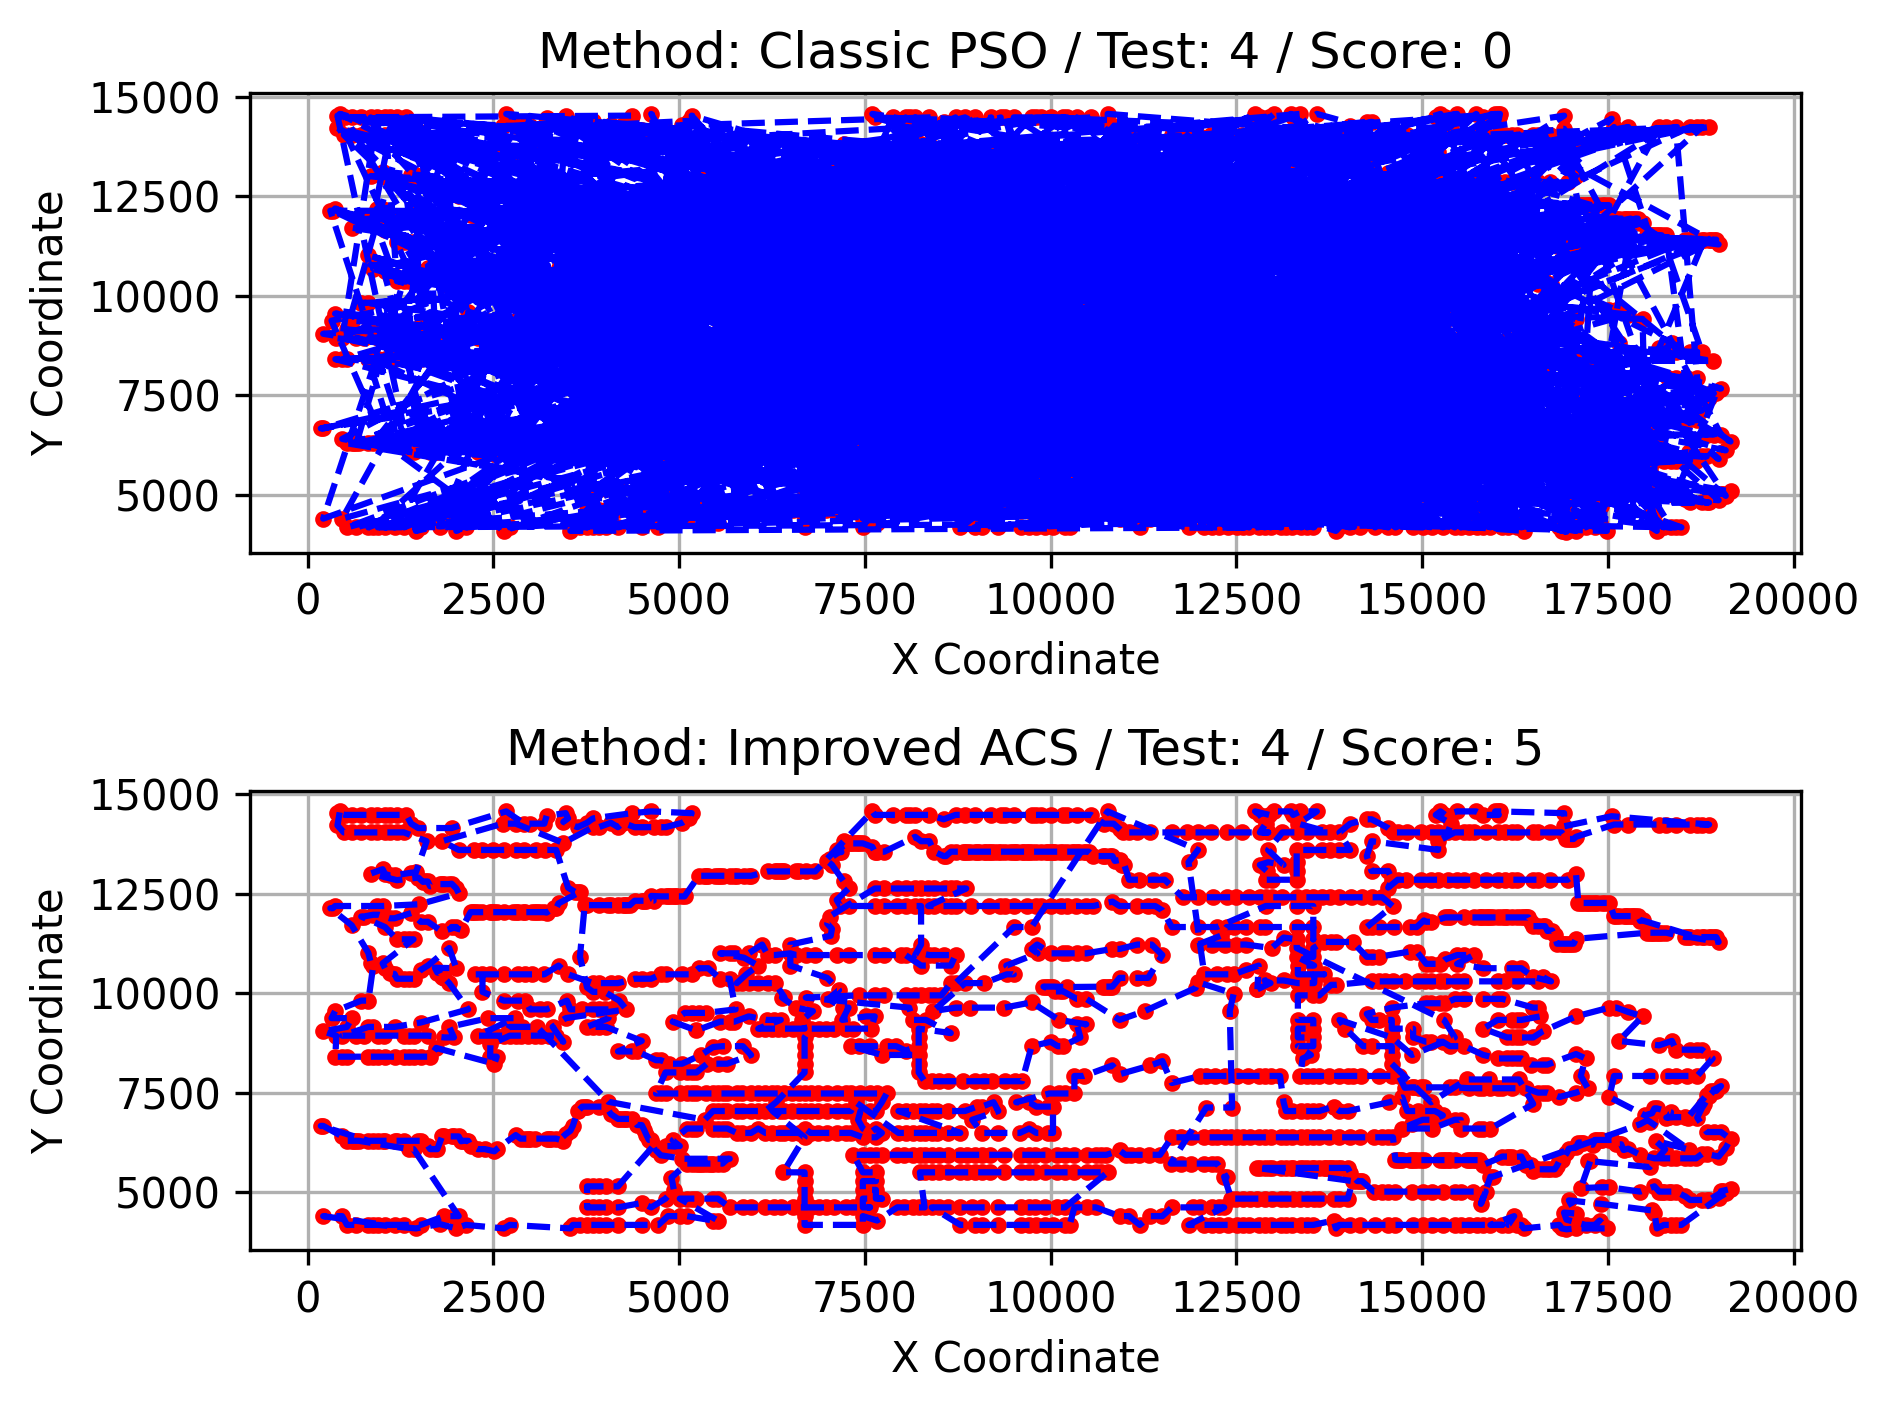

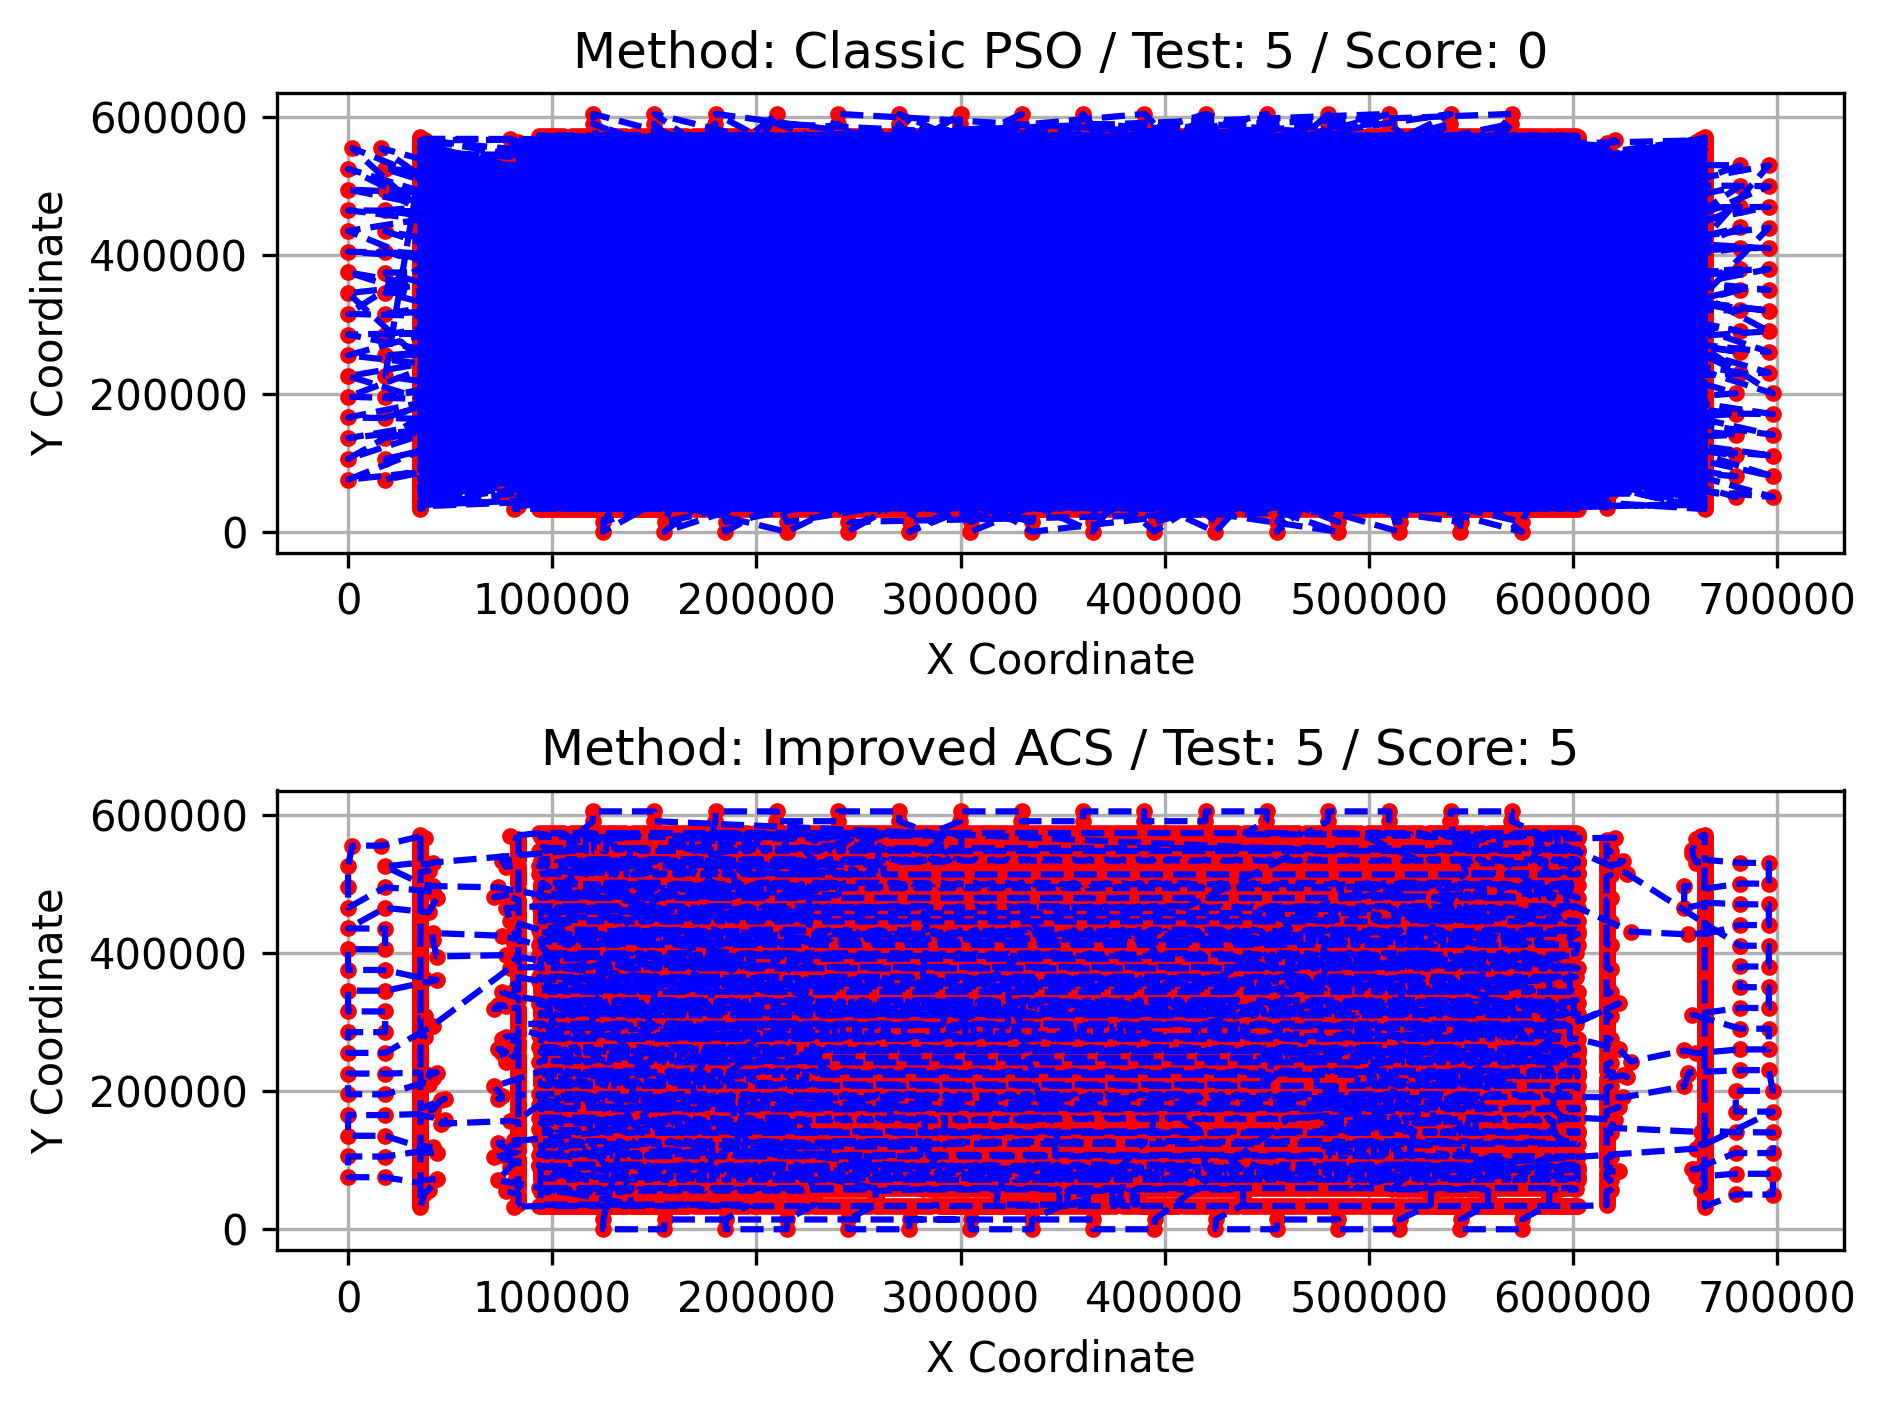

In [116]:
cities_list = []
tour_list = []


with (
    open("../answers/classic_pso_answer.txt", "r") as results_pso,
    open("../answers/improved_acs_answer.txt", "r") as results_acs,
):
    lines_pso, lines_acs = results_pso.readlines(), results_acs.readlines()

    if len(lines_pso) != len(lines_acs):
        raise ValueError("Error: The number of lines in the two files do not match.")

    for i in range(len(lines_pso)):
        test_num, score_pso, lst_pso = parse_string_to_components(lines_pso[i])
        _, score_acs, lst_acs = parse_string_to_components(lines_acs[i])

        cities = np.genfromtxt(names[i], skip_header=1)

        visualize_tour(
            f"{test_num}",
            cities,
            [lst_pso, lst_acs],
            [score_pso, score_acs],
        )